In [18]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.metrics import rand_score

import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]

In [28]:
# remove columns of sympdf that are more than 90% 0 or 1
# following https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7746621/?fbclid=IwAR1GqUi4_1P7Jeq-tBaK_zMEDrOibaRR8cH0bztGvEC5GtwqE5_PK64ZnNk
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.1) & (sympdf.sum()  / sympdf.shape[0]< 0.9)]

In [32]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=8, measurement="binary", verbose=0, random_state=123)


In [33]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.32s/it, max_LL=-3.8e+5, max_avg_LL=-62.9]


StepMix(measurement='binary', n_components=8, random_state=123)

In [34]:
mm = model.get_mm_df()


/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x1081dede0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [35]:
mm = mm.reset_index()


In [36]:
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)


In [37]:
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

In [38]:
print(mm.sort_values(0,ascending=False).head(10).index)
print(mm.sort_values(2,ascending=False).head(10).index)
print(mm.sort_values(3,ascending=False).head(10).index)
print(mm.sort_values(4,ascending=False).head(10).index)
print(mm.sort_values(5,ascending=False).head(10).index)
print(mm.sort_values(6,ascending=False).head(10).index)
print(mm.sort_values(7,ascending=False).head(10).index)


Index(['Symptom_PEM', 'Symptom_Shortness_of_breath',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Insomnia', 'Symptom_Muscle_aches',
       'Symptom_Tightness_of_chest', 'Symptom_Dry_cough',
       'Symptom_Elevated_temp', 'Symptom_Cognitive_Functioning_thinking',
       'Symptom_Dizziness_vertigo'],
      dtype='object', name='variable')
Index(['Symptom_PEM', 'Symptom_Dizziness_vertigo', 'Symptom_Muscle_aches',
       'Symptom_Insomnia',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Tightness_of_chest', 'Symptom_Shortness_of_breath',
       'Symptom_Heart_palpitations', 'Symptom_Joint_pain',
       'Symptom_Chills_flushing_sweats'],
      dtype='object', name='variable')
Index(['Symptom_PEM', 'Symptom_Insomnia', 'Symptom_Heart_palpitations',
       'Symptom_Dizziness_vertigo', 'Symptom_Sensations_tingling_prickling',
       'Symptom_Tightness_of_chest', 'Symptom_Tachycardia',
       'Symptom_Shortness_of_breath', 'Symp

In [12]:
# seems to be less well behaved with respect to high-frequency symptoms
# try filtering exceptionally rare or common symptoms and re-running

In [39]:
# might just be that I'm filtering for presence and not for uniqueness. I should probably filter for uniqueness
# well let's look at scores by patient.
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

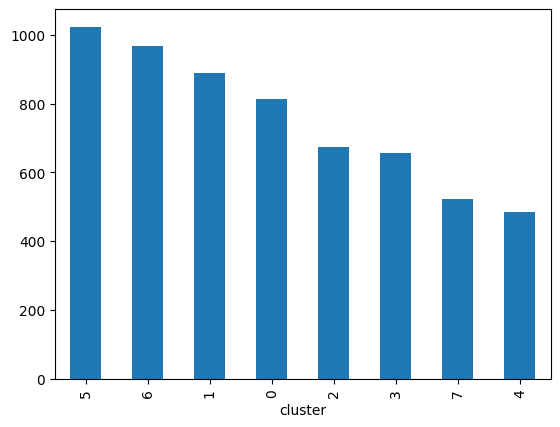

In [40]:
df['cluster'].value_counts().plot(kind='bar')


In [41]:
mm.sort_values(6,ascending=False).head(20)

class_no,variable,0,1,2,3,4,5,6,7
variable,,,,,,,,,
Symptom_PEM,Symptom_PEM,0.926536,0.879938,0.963420,0.899642,0.578587,0.967088,0.788533,0.995835
Symptom_Shortness_of_breath,Symptom_Shortness_of_breath,0.847502,0.638902,0.865522,0.701507,0.381563,0.810583,0.664380,0.930483
Symptom_Insomnia,Symptom_Insomnia,0.786307,0.548755,0.888831,0.771708,0.124608,0.765734,0.625964,0.952276
Symptom_Tightness_of_chest,Symptom_Tightness_of_chest,0.772353,0.495163,0.869154,0.719374,0.322456,0.730555,0.614088,0.912920
Symptom_Dry_cough,Symptom_Dry_cough,0.753718,0.545420,0.771292,0.542443,0.387966,0.690073,0.562512,0.811402
Symptom_Heart_palpitations,Symptom_Heart_palpitations,0.691357,0.452479,0.861462,0.752966,0.238752,0.774233,0.556298,0.904330
Symptom_Muscle_aches,Symptom_Muscle_aches,0.774718,0.522854,0.914728,0.693095,0.272551,0.783765,0.496656,0.962365
Symptom_Tachycardia,Symptom_Tachycardia,0.594456,0.399223,0.812751,0.711858,0.186943,0.676413,0.478893,0.901097
Symptom_Gasping_air_normal_oxygen,Symptom_Gasping_air_normal_oxygen,0.650965,0.403508,0.766091,0.585907,0.186637,0.648497,0.458958,0.818412


In [59]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [66]:
# create a list of integers from 0 to 6
# this is the number of components in the model
# we'll use this to iterate over the components
# and investigate them
comp_list = list(range(0,8))

In [67]:
for component in comp_list:
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))





variable
Symptom_Elevated_temp                                   0.232826
Symptom_Fever                                           0.230949
Symptom_Temp_lability                                   0.192551
Symptom_Chills_flushing_sweats                          0.169762
Symptom_Loss_of_appetite                                0.163566
Symptom_Diarrhea                                        0.157142
Symptom_Dry_cough                                       0.137846
Symptom_Shortness_of_breath                             0.134225
Symptom_Insomnia                                        0.118039
Symptom_Cognitive_Functioning_attentionconcentration    0.112183
dtype: float64
variable
Symptom_Cognitive_Functioning_thinking                   0.248212
Symptom_Cognitive_Functioning_executive                  0.236121
Symptom_Cognitive_Functioning_problemsolving             0.219830
Symptom_Cognitive_Functioning_attentionconcentration     0.182609
Symptom_Speech_difficulty_finding_words              

In [57]:
mm.shape[1]

8

In [58]:
mm

class_no,0,1,2,3,4,5,6,7
variable,,,,,,,,
Symptom_Acid_reflux,0.368676,0.138391,0.552971,0.415812,0.062888,0.361296,0.241245,0.677822
Symptom_Acute_confusion,0.155174,0.128149,0.320068,0.090082,0.004919,0.291295,0.011157,0.652734
Symptom_Altered_smell,0.260442,0.155141,0.294765,0.102952,0.181030,0.263246,0.137647,0.502175
Symptom_Altered_taste,0.300824,0.195356,0.378196,0.164597,0.192272,0.339915,0.162643,0.581920
Symptom_Awakened_cannot_breathe,0.372939,0.150433,0.570305,0.370009,0.035899,0.348924,0.199583,0.694442
...,...,...,...,...,...,...,...,...
Symptom_Vibrating_sensations,0.289052,0.189123,0.681146,0.612951,0.090862,0.479144,0.253866,0.812108
Symptom_Vivid_dreams,0.382786,0.216671,0.470600,0.251950,0.024643,0.423989,0.172819,0.643189
Symptom_Vomiting,0.206275,0.044305,0.269152,0.110148,0.018656,0.178024,0.074699,0.344139
